# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
# !pip install tensorflow
# !pip install keras
'''
Por defecto, keras no tira de GPU
'''

'\nPor defecto, keras no tira de GPU\n'

Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

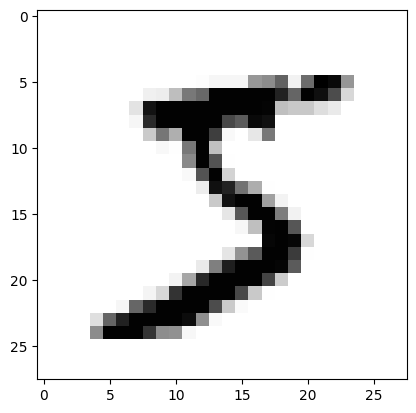

In [6]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [8]:
# Preprocess the data (these are NumPy arrays). Aplano a una dimension cada imagen.
# Escalamos ya que vamos a usar gradient descent, y le afecta mucho la escala de las features.
# Ejecutar esta celda solo una vez. Sino reescalará

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [9]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [10]:
# Reserve 10,000 samples for validation. Entraran dentro del modelo para validar. No es validacion cruzada
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

print(X_val)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [12]:
# Una manera de declarar la red neuronal

# Siempre hay que declarar la capa sequential para empezar a declarar la red
# Se trata de la API sequential
model = keras.models.Sequential()

# Flatten, aplana en un unico vector. Y especificamos el tamaño de la entrada
# Es como si hiciese un .reshape(-1, 28*28)
# "kernel_initializer" o "bias_initializer" No lo usamos pero seria para inicializar los pesos de otra manera
model.add(keras.layers.Flatten(input_shape=(28,28)))

# Capas de la red. Dense es la capa de neuronas. Necesitamos numero y activacion
model.add(keras.layers.Dense(units = 300, # Numero de neuronas de la capa
                             activation='relu'))

model.add(keras.layers.Dense(100,
                             activation='relu'))

# Capa de salida, con tamaño del número de clases
# Suele ir aqui un softmax. Para multiclase guay. Si es binaria -> sigmoide
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]
model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [13]:
print(model.layers[1])
model.layers

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [34]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

# 784 features (pixeles de las imagenes) x 300 neuronas
# Los pesos están inicializados aleatoriamente
biases.shape

(300,)

Establecemos la configuración de ejecución... el compile.

In [35]:
# Se especifica la configuración del entrenamiento (optimizador, pérdida, métricas):
model.compile(
    # Stocastic gradient descent. El algoritmo para minimizar la loss function
    # El stocastic va haciendo muestreo en cada evaluacion, no usa todo el dataset
    # Podemos modificar el learning rate(0.01 por defecto) mediante el parametro lr
    optimizer=keras.optimizers.SGD(),  # Optimizer
    
    
    # Loss function to minimize
    # sparse_categorical_crossentropy cuando tenemos un label en nuna columna
    # Si lo tuviesemos en varias tipo dummy, cogeriamos categorical_crossentropy
    # binary_crossentropy si es una neurona, clasi binario
    loss=keras.losses.SparseCategoricalCrossentropy(),
    
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [36]:
# Equivalente
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [38]:
784 * 300

235200

In [37]:
# Summary
# La primera hidden layer tiene 784 entradas x 300 salidas
# Son los 235500 params = 783x300 + 300 (bias)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [40]:
50000 // 64

781

In [41]:
50000 % 64

16

In [39]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 10 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64, # numero de muestras empleadas en el entrenamiento de SGD
    epochs=15, # 1 por defecto. Insuficiente. Numero de vueltas del backpropagation
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.1
    validation_data=(X_val, y_val)
)
'''
En el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.
Si vemos que ya no baja mas, no serán necesarias tantas epochs.
Imprimera tantas lineas como epochs hayamos puesto

Tampoco usamos el class_weight, que le da más peso a las clases con pocas muestras
Util para datasets desbalanceados.

El loss que muestra es el categoricalcrossentropy
'''


Fit model on training data
Epoch 1/15
782/782 [==============================] - 4s 3ms/step - loss: 0.8745 - accuracy: 0.7862 - val_loss: 0.3989 - val_accuracy: 0.8975
Epoch 2/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3760 - accuracy: 0.8962 - val_loss: 0.3102 - val_accuracy: 0.9150
Epoch 3/15
782/782 [==============================] - 2s 3ms/step - loss: 0.3108 - accuracy: 0.9124 - val_loss: 0.2682 - val_accuracy: 0.9249
Epoch 4/15
782/782 [==============================] - 3s 3ms/step - loss: 0.2748 - accuracy: 0.9226 - val_loss: 0.2441 - val_accuracy: 0.9315
Epoch 5/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2489 - accuracy: 0.9297 - val_loss: 0.2240 - val_accuracy: 0.9384
Epoch 6/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2283 - accuracy: 0.9354 - val_loss: 0.2080 - val_accuracy: 0.9424
Epoch 7/15
782/782 [==============================] - 2s 3ms/step - loss: 0.2114 - accuracy: 0.9402 - val_loss: 0.2076 - 

'\nEn el entreanamiento solo hay que fijarse que el loss va para abajo, es bueno.\nSi vemos que ya no baja mas, no serán necesarias tantas epochs.\nImprimera tantas lineas como epochs hayamos puesto\n\nTampoco usamos el class_weight, que le da más peso a las clases con pocas muestras\nUtil para datasets desbalanceados.\n\nEl loss que muestra es el categoricalcrossentropy\n'

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [23]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_val, y_val)
)

Epoch 1/15
625/625 [==============================] - 2s 3ms/step - loss: 0.1428 - accuracy: 0.9594 - val_loss: 0.1820 - val_accuracy: 0.9465
Epoch 2/15
625/625 [==============================] - 2s 3ms/step - loss: 0.1368 - accuracy: 0.9612 - val_loss: 0.1761 - val_accuracy: 0.9488
Epoch 3/15
625/625 [==============================] - 2s 3ms/step - loss: 0.1312 - accuracy: 0.9635 - val_loss: 0.1748 - val_accuracy: 0.9477
Epoch 4/15
625/625 [==============================] - 2s 3ms/step - loss: 0.1260 - accuracy: 0.9650 - val_loss: 0.1730 - val_accuracy: 0.9479
Epoch 5/15
625/625 [==============================] - 2s 3ms/step - loss: 0.1208 - accuracy: 0.9667 - val_loss: 0.1667 - val_accuracy: 0.9509
Epoch 6/15
625/625 [==============================] - 2s 2ms/step - loss: 0.1162 - accuracy: 0.9675 - val_loss: 0.1628 - val_accuracy: 0.9512
Epoch 7/15
625/625 [==============================] - 2s 2ms/step - loss: 0.1119 - accuracy: 0.9686 - val_loss: 0.1598 - val_accuracy: 0.9529
Epoch 

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [42]:
print(history.params)
print(history.epoch)
history.history

{'verbose': 1, 'epochs': 15, 'steps': 782}
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


{'loss': [0.8744902610778809,
  0.37598273158073425,
  0.3108217120170593,
  0.2747997045516968,
  0.2489413619041443,
  0.2282673567533493,
  0.21140503883361816,
  0.1969728320837021,
  0.1840558648109436,
  0.17308218777179718,
  0.16309019923210144,
  0.15413427352905273,
  0.14587754011154175,
  0.13842375576496124,
  0.13200995326042175],
 'accuracy': [0.7862200140953064,
  0.8962000012397766,
  0.9124400019645691,
  0.9225599765777588,
  0.9296600222587585,
  0.9354000091552734,
  0.9401800036430359,
  0.944379985332489,
  0.9476799964904785,
  0.9505599737167358,
  0.9536799788475037,
  0.9559400081634521,
  0.9582800269126892,
  0.9603999853134155,
  0.9623200297355652],
 'val_loss': [0.39889341592788696,
  0.31022244691848755,
  0.2681804299354553,
  0.24405331909656525,
  0.22401152551174164,
  0.20796559751033783,
  0.20757627487182617,
  0.18300428986549377,
  0.17267726361751556,
  0.16413360834121704,
  0.1578187495470047,
  0.15061920881271362,
  0.1470504105091095,
  0

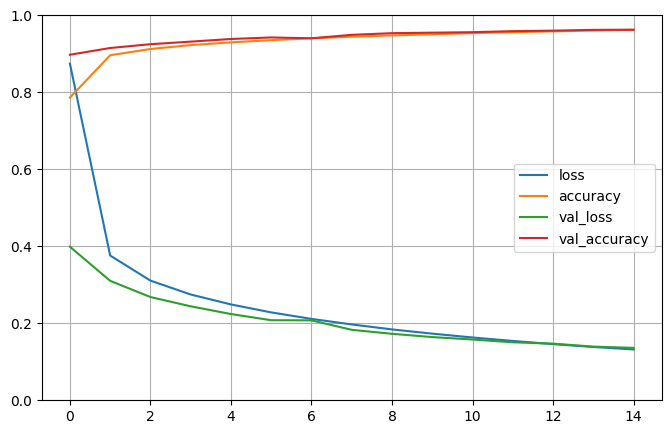

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [44]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
313/313 [==============================] - 1s 2ms/step - loss: 0.1365 - accuracy: 0.9597
test loss, test acc: [0.1364564150571823, 0.9596999883651733]


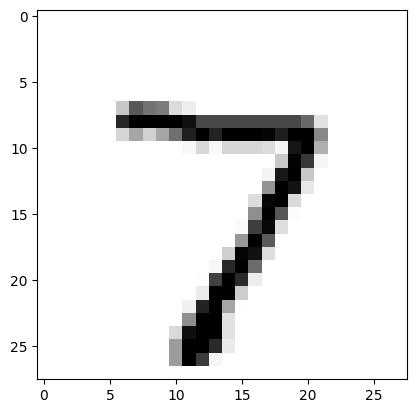

In [45]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [46]:
'''
Ojo aqui viene slicing xq presupone que le entran varios inputs
Nos da las probabilidades de pertenecer a una clase u otra.
'''
predictions = model.predict(X_test[:1]).round(3)
print("predictions shape:", predictions.shape)
predictions

1/1 [==============================] - 0s 99ms/step
predictions shape: (1, 10)


array([[0.   , 0.   , 0.001, 0.006, 0.   , 0.   , 0.   , 0.993, 0.   ,
        0.   ]], dtype=float32)

In [20]:
predictions.max()

0.998

In [21]:
predictions.argmax()

7

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [48]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [50]:
print(housing["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Divimos en train, test y validation

In [52]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [53]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [83]:
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation="relu",
                       input_shape=X_train.shape[1:]),
    # keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1) # una unica neurona de salida
    # Sin fun de activa. ReLu no iria mal si el output es positivo. Sigmoide si esta acotado.
])

model.compile(loss="mean_squared_error",
              optimizer="sgd")

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8131 - val_loss: 0.5516
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5024 - val_loss: 0.4839
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5148 - val_loss: 0.5031
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6948 - val_loss: 0.5028
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4788 - val_loss: 0.4595
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4400 - val_loss: 0.4336
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4248 - val_loss: 0.4231
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4201 - val_loss: 0.4166
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4119 - val_loss: 0.4145
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4072 - val_loss: 0.4080

In [84]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 1ms/step - loss: 0.3616


0.3616371154785156

In [85]:

X_new = X_test[:3] # pretend these are new instances
print(X_new)
y_pred = model.predict(X_new)
y_pred, y_test[:3]

[[-0.61957979 -0.67592367  0.08412592 -0.10039718  0.07289654 -0.0463827
   0.92797357 -0.61919417]
 [-0.03151624  0.75532808 -0.03160274 -0.08665681  0.10496528  0.04654674
  -0.76249466  0.75326462]
 [ 0.6284241  -0.5168957   0.39249789 -0.19792951 -0.19189962 -0.00860825
   1.35175485 -0.88370441]]
1/1 [==============================] - 0s 54ms/step


(array([[0.98643917],
        [1.8616631 ],
        [1.6923239 ]], dtype=float32),
 array([2.013, 1.71 , 1.269]))

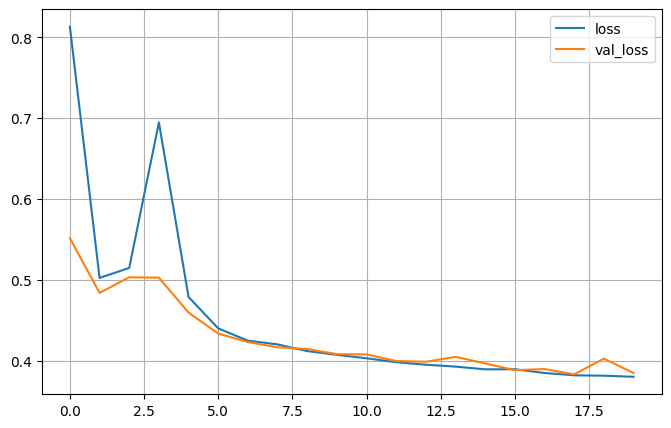

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [87]:
model.save("my_keras_model.h5")

In [88]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [89]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation="relu",
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # una unica neurona de salida
    # Sin fun de activa. ReLu no iria mal si el output es positivo. Sigmoide si esta acotado.
])

model.compile(loss="mean_squared_error",
              optimizer="sgd")

history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 966us/step - loss: 0.7340
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7066
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4816
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 5/10
363/363 [==============================] - 0s 943us/step - loss: 0.4414
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4324
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4236
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4191
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4122
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4056
Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4181 - val_loss: 0.4085
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3980 - va

In [90]:
model_cb = keras.models.load_model('callback_model.h5')
model_cb.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 1ms/step - loss: 0.3626


0.36264026165008545

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [91]:
'''
10 esta bien. Lo pondemos a 5 para el ejercicio
¿Qué considera como dejar de mejorar? parametros min_delta y baseline
'''
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, 
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3645 - val_loss: 0.3604
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3641 - val_loss: 0.3602
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3625 - val_loss: 0.3730
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3598 - val_loss: 0.3575
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3734 - val_loss: 0.3625
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3571 - val_loss: 0.3607
Epoch 7/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3941 - val_loss: 0.3996
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3635 - val_loss: 0.4125
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3564 - val_loss: 0.3551
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3586 - val_lo

In [92]:
model.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 1ms/step - loss: 0.3419


0.3418620228767395

In [93]:
model_load = keras.models.load_model("callback_model.h5")
model_load.evaluate(X_valid, y_valid)

121/121 [==============================] - 0s 942us/step - loss: 0.3598


0.35978618264198303

### Dashboard
Keras tiene implementado un dashboard para monitorizar las ejecuciones del modelo

In [101]:
import os

# Crea este directorio
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

# Guarda una carpeta nueva con la fecha de la ejecucion
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [102]:
run_logdir

'.\\my_logs\\run_2023_05_22-13_39_54'

In [103]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
model = keras.models.Sequential([
    
    # No hace falta capa de flatten. No hay que aplanar ninguna imagen
    keras.layers.Dense(30, activation="relu",
                       input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # una unica neurona de salida
    # Sin fun de activa. ReLu no iria mal si el output es positivo. Sigmoide si esta acotado.
])

model.compile(loss="mean_squared_error",
              optimizer="sgd")

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/50
363/363 [==============================] - 5s 12ms/step - loss: 0.9559 - val_loss: 0.5411
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 7.1184 - val_loss: 0.5674
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4873 - val_loss: 0.4469
Epoch 4/50
363/363 [==============================] - 1s 1ms/step - loss: 0.4262 - val_loss: 0.4035
Epoch 5/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3970 - val_loss: 0.3959
Epoch 6/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3919 - val_loss: 0.3892
Epoch 7/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3846 - val_loss: 0.3838
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3797 - val_loss: 0.3822
Epoch 9/50
363/363 [==============================] - 0s 1ms/step - loss: 0.3852 - val_loss: 0.3746
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3766 - val_loss: 0.374

In [30]:
'''
Para lanzarlo desde el jupyter notebook
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Para lanzarlo desde el terminal, hay que estar en la carpeta de los logs
tensorboard --logdir=./my_logs --port=6006

'''

Launching TensorBoard...

KeyboardInterrupt: 